# Pymaceuticals Inc.
---




### Background

The purpose of this project is to generate tables and figures for the technical report of the clinical study on mice that were identify with SCC tumor. 
In this study, 248 mice (after removing the duplicate) that received treatment with range of drug regimens over the course of 45 days and their tumor development was observed and measured during this time period. We’ll compare the performance of drug named Capomulin against the other drug regimens on this study.

### Analysis

There are 10 drug regimens in this study. Out of the 248 mice, there are 51% male mice and  49% female mice; and 230 mice were treated with Capomulin, and 178 mice were treated with Propriva.  Capomulin treatment represents the maximum number of treatments for the drug regimens while the Propriva trements represents the minimum number of treatments for the drug regimens.

The box plot compares the result of the final tumor volume among 4 drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin, and it shows that the final tumor volumes of mice that were treated by Capomulin and Ramicane  are less than those that were treated with Infubinol and Ceftamin. The result is also confirmed by the summary statistic table where it shows the mean of the tumor volume among the 10 drug regimens in this study. According to the statistic table, the mean of the tumor volume of Campomulin and Remican are at the lowest comparing to the mean of the tumor volume from other drug regimens.

In this study, we picked mouse id # l509 to observe the development of tumor volume over the period of 45 days that it was treated with Campomulin. The line chart shows that the tumor volume decreased significantly over the period of time. However, more samples are need to be picked in order to conclude that Campomulin is effective in reducing the size of the tumor.

The scatter plot shows that the correlation between mouse weight and the average tumor volume is 0.84. It means that there is a positive correlation between these 2 factors  as the weight of mice increase, the tumor size increase.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID") *** remove later
mouse_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_total = len(mouse_study_data["Mouse ID"].unique())
mouse_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicateID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseDF = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]
dup_mouseDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data[mouse_study_data["Mouse ID"] != 'g989']
clean_mouse_data = clean_mouse_data.reset_index()
clean_mouse_data.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_total = len(clean_mouse_data["Mouse ID"].unique())
clean_mouse_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

meanTumor = clean_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
medianTumor = clean_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
stdTumor = clean_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
varTumor = clean_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()       
semTumor = clean_mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem() 
 
# Assemble the resulting series into a single summary DataFrame.
sta_drugDF = pd.DataFrame({
    
            "Mean Tumor Volume": meanTumor,
            "Median Tumor Volume": medianTumor,
            "Tumor Volume Variance": varTumor,
            "Tumor Volume Std.Dev": stdTumor,
            "Tumor Volume Std.Err": semTumor   
    
    })
sta_drugDF


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
result = clean_mouse_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

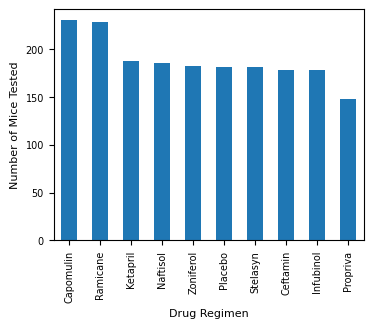

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_test = clean_mouse_data.groupby('Drug Regimen')["Timepoint"].count().sort_values(ascending=False)
mouse_test

mouse_chart = mouse_test.plot(kind='bar', figsize=(4,3), fontsize = 7)
mouse_chart.set_xlabel("Drug Regimen", fontsize = 8)
mouse_chart.set_ylabel("Number of Mice Tested", fontsize = 8)
 
plt.show()

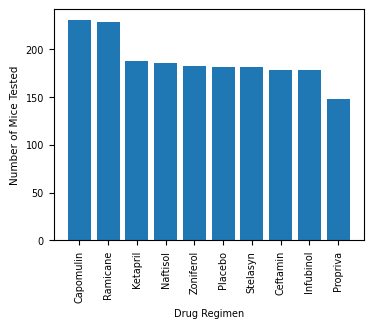

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
newdf = clean_mouse_data[['Drug Regimen', 'Timepoint']].copy()

df2 = newdf.groupby(['Drug Regimen'], as_index=False).count().sort_values(by=['Timepoint'], ascending=False)
xAxis = np.arange(len(df2))
ticks = [x for x in xAxis]

fig = plt.figure(figsize=(4, 3))
plt.bar(xAxis, df2["Timepoint"])
plt.xticks(ticks, df2["Drug Regimen"], rotation="vertical", fontsize=7)
plt.yticks(fontsize = 7)
plt.xlabel("Drug Regimen", fontsize=7)
plt.ylabel("Number of Mice Tested", fontsize=7.5)
 
plt.show()

<AxesSubplot:ylabel='Sex'>

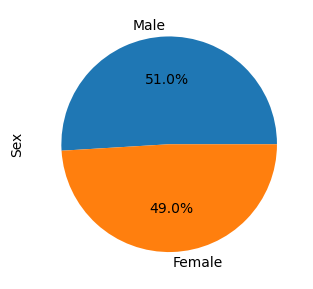

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
newdf2 = clean_mouse_data['Sex'].value_counts()
newdf2

fig = plt.figure(figsize=(3.5, 3.5))
newdf2.plot(kind='pie', autopct='%1.1f%%')


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

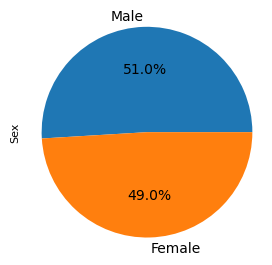

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
newdf2 = clean_mouse_data[['Sex']].copy()
df3 = newdf2.groupby(['Sex'], as_index=False).value_counts().sort_values(by=['Sex'], ascending=False)

gender2 = df3['Sex']
count2 = df3['count']

fig = plt.figure(figsize=(3, 3))
plt.pie(count2, labels=gender2, autopct="%1.1f%%")
plt.ylabel('Sex', fontsize= 8)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatTimeDF = clean_mouse_data.groupby('Mouse ID')["Timepoint"].max()
greatTimeDF = greatTimeDF.reset_index()
greatTimeDF

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(greatTimeDF, clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_name in drug_list:
    
    # if value of drug regiment is one of the 4 in list, grab value for tumor and assign to tumorValue
    tumorValue = merge_df.loc[merge_df['Drug Regimen'] == drug_name, 'Tumor Volume (mm3)']
    
    #now add value of tumor volume to list
    tumor_vol_data.append(tumorValue)
     
    quartile = tumorValue.quantile([.25, .5, .75])
    lowerquartile = quartile[.25]
    upperquartile = quartile[.75]
    inner_quartile_range = upperquartile-lowerquartile
    lower_bound = lowerquartile - (1.5*inner_quartile_range)
    upper_bound = upperquartile + (1.5*inner_quartile_range) 
    
    
    outliers = tumorValue.loc[(tumorValue < lower_bound) | (tumorValue > upper_bound)]
    print(f'{drug_name}\'s  potential outliers: {outliers}')

Capomulin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's  potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


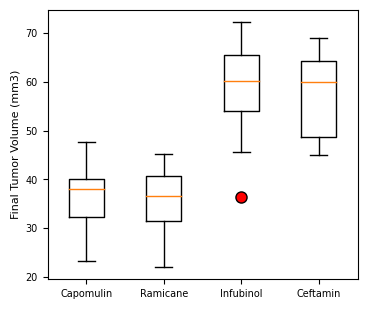

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

props = {'markerfacecolor': 'red', 'markersize': 8}

plt.ylabel("Final Tumor Volume (mm3)", fontsize =8)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)

plt.boxplot(tumor_vol_data, labels = drug_list, flierprops=props)
plt.rcParams['figure.figsize'] = [4, 3.5]
plt.rcParams['xtick.labelsize'] = 7
plt.show()

## Line and Scatter Plots

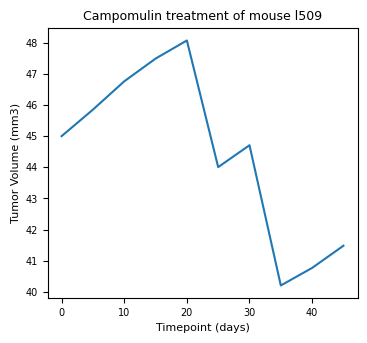

<Figure size 400x300 with 0 Axes>

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseCam = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]

# pick mouse ID l509 to plot line chart
mouse509 = mouseCam.loc[mouseCam['Mouse ID'] == "l509"]

# Plot line chart
x_axis = np.arange(len(mouse509))
 
tick_locations = [value for value in x_axis]
plt.plot(mouse509['Timepoint'], mouse509['Tumor Volume (mm3)'])

# Setting the interval of ticks of y-axis from 40 to 49.
listOf_Yticks = np.arange(40, 49, 1)
plt.yticks(listOf_Yticks, fontsize = 7)
plt.title('Campomulin treatment of mouse l509', fontsize = 9)
plt.xlabel('Timepoint (days)', fontsize = 8)
plt.ylabel('Tumor Volume (mm3)', fontsize = 8)
fig = plt.figure(figsize=(4, 3))
plt.show()                           

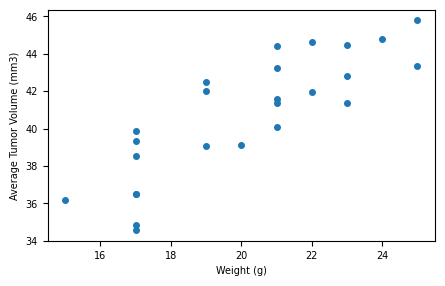

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouseCam = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
avgTumor = mouseCam.groupby('Mouse ID').mean()

s = 16
fig = plt.figure(figsize=(5, 3))
plt.scatter(avgTumor['Weight (g)'], avgTumor['Tumor Volume (mm3)'], marker='o', s=s)
plt.xlabel('Weight (g)', fontsize=7)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=7)
plt.yticks(fontsize = 7)
plt.show()                       

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


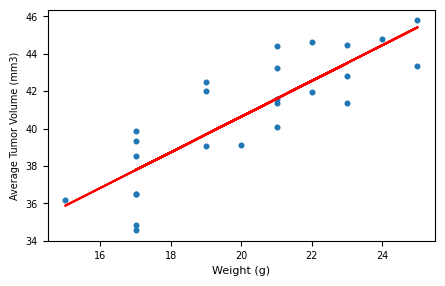

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouseCam = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
avgTumor = mouseCam.groupby('Mouse ID').mean()

x_values = avgTumor['Weight (g)']
y_values = avgTumor['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

fig = plt.figure(figsize=(5, 3))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # generates a list of values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

s = 11
plt.scatter(x_values,y_values, marker='o', s=s)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.1),fontsize=10,color="red")
plt.xlabel('Weight (g)', fontsize=8)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=7)
plt.yticks(fontsize = 7)
plt.show()                       

Prepared by Ratima Chowadee (2023)